In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score

In [8]:
data = pd.read_excel('bank_additional_full_clean.xlsm')

In [9]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [11]:
cat_to_code = data.select_dtypes(['object']).astype('category').apply(lambda x: x.cat.codes)
data[list(cat_to_code)] = cat_to_code
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [12]:
ys = data['y']
xs = data.loc[:, data.columns != 'y']

[Text(0.5, 0.8333333333333334, 'X[19] <= 5087.65\nentropy = 0.508\nsamples = 41188\nvalue = [36548, 4640]'),
 Text(0.25, 0.5, 'X[10] <= 158.5\nentropy = 0.991\nsamples = 4964\nvalue = [2755, 2209]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.61\nsamples = 1694\nvalue = [1440, 254]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.972\nsamples = 3270\nvalue = [1315, 1955]'),
 Text(0.75, 0.5, 'X[10] <= 472.5\nentropy = 0.355\nsamples = 36224\nvalue = [33793, 2431]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.154\nsamples = 31481\nvalue = [30782, 699]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.947\nsamples = 4743\nvalue = [3011, 1732]')]

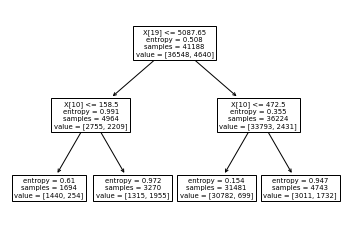

In [20]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree_clf.fit(xs, ys)

plot_tree(tree_clf)

In [19]:
accuracy_score(y_true=ys, y_pred=tree_clf.predict(xs))

0.9854326502864912

In [33]:
tree_clf.predict([[0, 1]]) #given the decision tree,what will be the result for someone aged 0 and duration 1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['no'], dtype=object)